<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/UAS/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Jan  6 01:42:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
# Import torch
import torch



# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.1.0+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision import datasets, transforms

# Transformasi data untuk normalisasi
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Memuat dataset pelatihan dan pengujian
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 145252808.04it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 42429314.82it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42485341.81it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5217893.39it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

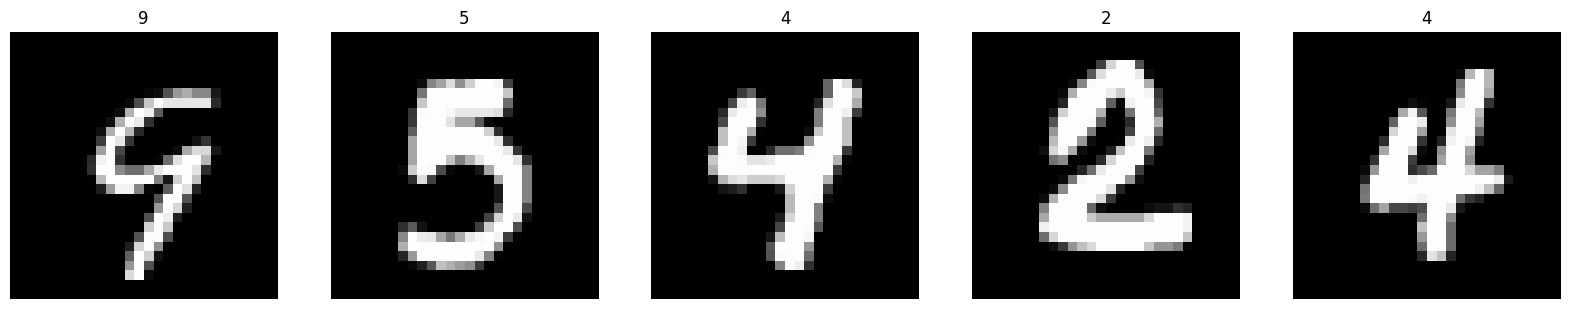

In [4]:
import matplotlib.pyplot as plt

# Memilih lima sampel acak dari dataset pelatihan
samples = torch.utils.data.Subset(train_data, torch.randint(0, len(train_data), (5,)))

# Membuat plot untuk sampel tersebut
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, (image, label) in enumerate(samples):
    ax[i].imshow(image.squeeze(), cmap='gray')
    ax[i].set_title(label)
    ax[i].axis('off')
plt.show()


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

# Membuat dataloader untuk set pelatihan dan pengujian
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class TinyVGG(nn.Module):
    def __init__(self):
        super(TinyVGG, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.fc1 = nn.Linear(in_features=320, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Menginstansiasi model
model = TinyVGG().to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [20]:
# Mengatur fungsi loss dan optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Melatih model
for epoch in range(5):
    start_time = time.time()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    end_time = time.time()
    print(f"Epoch {epoch+1} finished in {end_time - start_time:.2f} seconds")


Epoch 1 finished in 17.79 seconds
Epoch 2 finished in 16.05 seconds
Epoch 3 finished in 16.32 seconds
Epoch 4 finished in 16.23 seconds
Epoch 5 finished in 16.00 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

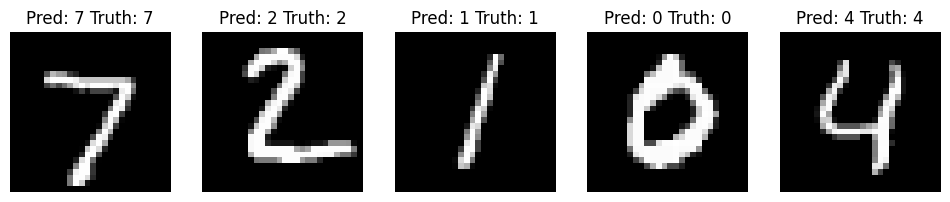

In [21]:
test_images, test_labels = next(iter(test_loader))
test_images, test_labels = test_images.to(device), test_labels.to(device)
with torch.no_grad():
    output = model(test_images)

# Visualisasi prediksi
_, predictions = torch.max(output, 1)
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"Pred: {predictions[i].item()} Truth: {test_labels[i].item()}")
    plt.axis('off')
plt.show()


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

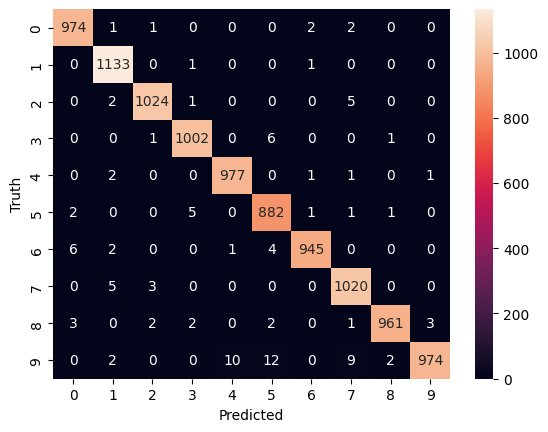

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Mendapatkan semua prediksi
all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(target.cpu().numpy())

# Menghitung confusion matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [23]:
random_tensor = torch.randn(1, 3, 64, 64).to(device)
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1).to(device)
output = conv_layer(random_tensor)
print(f"Output shape with kernel_size=3: {output.shape}")

# Mengubah kernel_size
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1, padding=2).to(device)
output = conv_layer(random_tensor)
print(f"Output shape with kernel_size=5: {output.shape}")


Output shape with kernel_size=3: torch.Size([1, 10, 64, 64])
Output shape with kernel_size=5: torch.Size([1, 10, 64, 64])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

100%|██████████| 26421880/26421880 [00:02<00:00, 12502312.37it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211934.35it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3873662.06it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6424360.90it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



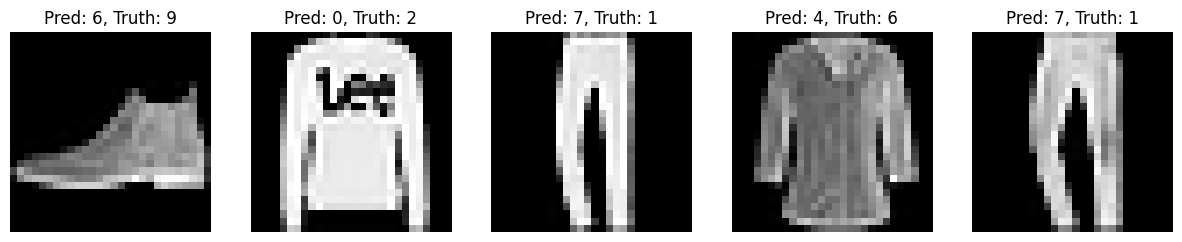

In [24]:
# Memuat dataset FashionMNIST dan membuat DataLoader
fashion_train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashion_test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_train_loader = DataLoader(fashion_train_data, batch_size=32, shuffle=True)
fashion_test_loader = DataLoader(fashion_test_data, batch_size=32, shuffle=False)

# Latih model serupa dengan TinyVGG pada FashionMNIST (gunakan langkah-langkah di atas)

# Membuat prediksi dan visualisasi di mana model salah
wrong_images = []
wrong_labels = []
correct_labels = []
model.eval()
with torch.no_grad():
    for data, target in fashion_test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, preds = torch.max(outputs, 1)
        wrong_preds = preds != target
        wrong_images.extend(data[wrong_preds])
        wrong_labels.extend(preds[wrong_preds])
        correct_labels.extend(target[wrong_preds])

# Memplot beberapa contoh prediksi yang salah
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(wrong_images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"Pred: {wrong_labels[i].item()}, Truth: {correct_labels[i].item()}")
    plt.axis('off')
plt.show()
